In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
bookings_df = pd.read_csv('Bookings.csv')
sessions_df = pd.read_csv("Sessions.csv")

In [3]:
bookings_df.head(5)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [4]:
sessions_df.head(5)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


### 1) Find the number of distinct bookings, sessions, and searches from the given data sets.

In [5]:
# Count the number of distinct bookings, session,and search
num_distinct_bookings = bookings_df["booking_id"].nunique()
num_distinct_session = sessions_df["session_id"].nunique()
num_distinct_search = sessions_df["search_id"].nunique()


print("Number of distinct Bookings:",num_distinct_bookings)
print("Number of distinct Sessions:",num_distinct_session)
print("Number of distinct Search:",num_distinct_search)

Number of distinct Bookings: 339
Number of distinct Sessions: 331
Number of distinct Search: 1360


### 2. How many sessions have more than one booking?

In [6]:
#Merge session_df and bookings_df on bookingg_id
merged_df = pd.merge(sessions_df,bookings_df,on="booking_id")

#GroupBy session_id and count the number of bookings
session_booking_counts = merged_df.groupby('session_id')["booking_id"].nunique()

#Count sessions with more than one booking
session_with_multiple_bookings = session_booking_counts[session_booking_counts>1].count()

print("Number of sessions with more than one Bookings:",session_with_multiple_bookings)

Number of sessions with more than one Bookings: 10


### 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?

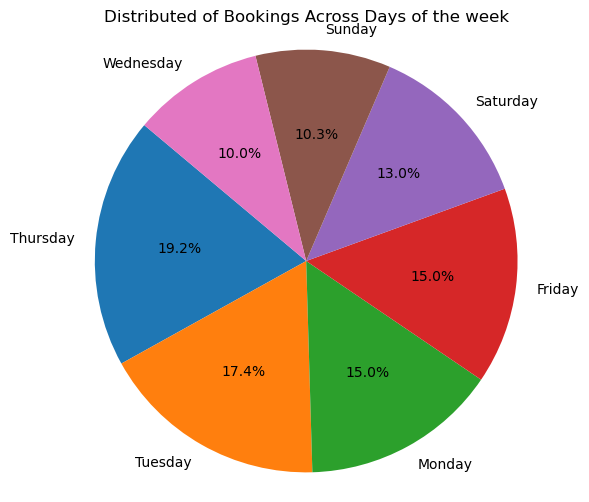

Day(s) with the highest number of bookings: Thursday
Number of bookings on the hightest booking day: 7


In [7]:
#Convert "Booking_time" column to datetime
bookings_df["booking_time"] = pd.to_datetime(bookings_df['booking_time'])

#Extract day of the week and count bookings for each day
bookings_df["day_of_week"] = bookings_df['booking_time'].dt.day_name()
daily_booking_count = bookings_df['day_of_week'].value_counts()

#Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(daily_booking_count, labels=daily_booking_count.index,autopct ='%1.1f%%',startangle=140)
plt.title("Distributed of Bookings Across Days of the week")
plt.axis("equal")
plt.show()

#Find the day(s) with the hightest number if bookings
max_bookings_day = daily_booking_count.idxmax()
max_bookings_count = daily_booking_count.count()

print("Day(s) with the highest number of bookings:",max_bookings_day)
print("Number of bookings on the hightest booking day:",max_bookings_count)

### 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

In [8]:
#Groupby by service_name and calculate total bookings and totalGBV
service_stats = bookings_df.groupby("service_name").agg(
    total_bookings = ('booking_id', "count"),
    total_gbv_inr = ("INR_Amount","sum")
)

#Display the total number of bookings and total GBV for each service name
print(service_stats)

              total_bookings  total_gbv_inr
service_name                               
GOIBIBO                  186     5897637.97
MMT                       48      665669.08
YATRA                    105     3378702.13


### 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [9]:
#Find customer with more than one bookings
multi_booking_customer = bookings_df["customer_id"].value_counts()
multi_booking_customer = multi_booking_customer[multi_booking_customer >1].index.tolist()
multi_booking_customer

['customer_97',
 'customer_160',
 'customer_246',
 'customer_217',
 'customer_230',
 'customer_176',
 'customer_44',
 'customer_265',
 'customer_144',
 'customer_247',
 'customer_235',
 'customer_120',
 'customer_67',
 'customer_255',
 'customer_33',
 'customer_137',
 'customer_297',
 'customer_282',
 'customer_245',
 'customer_93',
 'customer_200',
 'customer_155',
 'customer_179',
 'customer_237',
 'customer_28',
 'customer_49']

In [10]:
#Filter bookings for multi-booking customer
multi_booking_df = bookings_df[bookings_df["customer_id"].isin(multi_booking_customer)]
multi_booking_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day_of_week
6,customer_28,booking_129,Kolkata,India,Gurgaon,India,2022-02-16 15:50:27+00:00,Desktop,13442.40,GOIBIBO,1.0,13.0,1310.7,Wednesday
7,customer_217,booking_18,Bhubaneswar,India,Durlaga,India,2021-09-10 19:09:12+00:00,Desktop,4352.00,GOIBIBO,2.0,47.0,260.5,Friday
13,customer_282,booking_212,Indore,India,Mumbai,India,2021-10-16 07:56:59+00:00,IOS,4725.60,GOIBIBO,1.0,0.0,506.2,Saturday
16,customer_179,booking_218,Gurgaon,India,Port Blair,India,2020-01-12 17:34:59+00:00,Desktop,17804.80,MMT,2.0,35.0,2486.8,Sunday
24,customer_179,booking_157,Mumbai,India,Jaipur,India,2020-01-23 13:58:39+00:00,Desktop,6953.60,GOIBIBO,1.0,15.0,921.8,Thursday
29,customer_247,booking_119,Gurgaon,India,Fiumicino,Italy,2021-11-08 15:50:49+00:00,Android,21788.00,GOIBIBO,1.0,25.0,5932.6,Monday
42,customer_137,booking_88,Gurgaon,India,Birmingham,United Kingdom,2019-12-22 08:49:25+00:00,IOS,46142.40,YATRA,1.0,19.0,7190.9,Sunday
48,customer_49,booking_56,Gurgaon,India,Roissy-en-France,France,2021-10-11 05:01:16+00:00,IOS,22013.60,GOIBIBO,1.0,1.0,6564.2,Monday
55,customer_245,booking_215,Pune,India,Nagpur,India,2020-01-28 16:48:38+00:00,Android,7241.46,MMT,1.0,7.0,621.7,Tuesday
65,customer_246,booking_25,Delhi,India,Paris,France,2022-05-25 11:55:16+00:00,IOS,33216.00,GOIBIBO,1.0,9.0,6585.3,Wednesday


In [11]:
#Groupby route (from_city to to_city) and count bookings
route_stats = multi_booking_df.groupby(['from_city', "to_city"]).size().reset_index(name="booking_count")
route_stats

,from_city,to_city,booking_count
0,Ahmedabad,Gwalior,1
1,Barelā,Gurgaon,1
2,Bhubaneswar,Durlaga,1
3,Bikaner,Gurgaon,1
4,Bālāpur,Düsseldorf,2
5,Delhi,Jammu,1
6,Delhi,Paris,1
7,Delhi,Varanasi,1
8,Delhi,Yol,1
9,Devanhalli,Gurgaon,2


In [12]:
#Find the most booked route
most_booked_route = route_stats.loc[route_stats["booking_count"].idxmax()]
most_booked_route

from_city                 Gurgaon
to_city          Roissy-en-France
booking_count                   5
Name: 26, dtype: object

In [13]:
print("Most booked route(from_city to to_city):",most_booked_route["from_city"],"to",most_booked_route["to_city"])

Most booked route(from_city to to_city): Gurgaon to Roissy-en-France


### 6.Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [14]:
#Group by from_city and calculate average days of departure
avg_days_to_departure = bookings_df.groupby("from_city")['days_to_departure'].mean()
avg_days_to_departure

from_city
Agartala               1.000000
Ahmedabad             11.750000
Angamāli              29.500000
Bangalore             37.500000
Barelā                 3.000000
Bhubaneswar           24.500000
Bikaner                0.000000
Bālāpur               46.166667
Chennai               26.187500
Chicalim              30.000000
Delhi                 12.758621
Devanhalli            29.583333
Dharamsala             3.000000
Durlaga               58.500000
Ferokh                 1.000000
Gannavaram            28.000000
Gurgaon               26.176471
Hyderabad             29.500000
Hyderābād              1.000000
Indore                 0.000000
Jaipur                 7.750000
Jammu                  5.000000
Kochi                 45.500000
Kolkata               18.500000
Lucknow                9.000000
Madhyamgram           15.000000
Mohali                10.000000
Mumbai                21.764706
Nagpur                 1.000000
New Delhi             21.285714
Patna                  1.00000

In [15]:
#Filter cities with at least 5 departure
departure_count = bookings_df["from_city"].value_counts()
eligible_cities = departure_count[departure_count >= 5].index
eligible_cities

Index(['Gurgaon', 'Mumbai', 'Delhi', 'Devanhalli', 'Rāja Sānsi', 'Chennai',
       'Ahmedabad', 'New Delhi', 'Madhyamgram', 'Bālāpur'],
      dtype='object', name='from_city')

In [16]:
#Filter and sort average days to departure for eligible cities
eligible_avg_days_to_departure = avg_days_to_departure.loc[eligible_cities].sort_values(ascending=False)
eligible_avg_days_to_departure

from_city
Bālāpur        46.166667
Devanhalli     29.583333
Chennai        26.187500
Gurgaon        26.176471
Mumbai         21.764706
New Delhi      21.285714
Madhyamgram    15.000000
Delhi          12.758621
Ahmedabad      11.750000
Rāja Sānsi      8.823529
Name: days_to_departure, dtype: float64

In [17]:
#Display top 3 departure cities
top_3_departure_cities = eligible_avg_days_to_departure.head(3)
print("Top 3 departure cities with at least 5 departure and most advance bookings:")
print(top_3_departure_cities)

Top 3 departure cities with at least 5 departure and most advance bookings:
from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


### 7.Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

In [18]:
bookings_df.select_dtypes(include=['float']) #To access only float value

,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2565.28,1.0,10.0,747.8
1,23120.00,1.0,1.0,6701.5
2,25717.60,1.0,32.0,7712.0
3,135969.60,2.0,69.0,6112.5
4,31791.20,1.0,3.0,6570.4
...,...,...,...,...
334,2721.60,1.0,26.0,421.0
335,6552.00,1.0,0.0,1274.7
336,126502.46,2.0,109.0,7190.9
337,55152.80,2.0,22.0,6760.0


In [19]:
#Calculate Correlation matrix
correlation_matrix = bookings_df.select_dtypes(include=['float']).corr()
correlation_matrix

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,1.000000,0.397229,0.284534,0.623565
no_of_passengers,0.397229,1.000000,0.187128,0.001698
days_to_departure,0.284534,0.187128,1.000000,0.216972
distance_km,0.623565,0.001698,0.216972,1.000000


In [20]:
#Get Upper Triangle matrix to avoid dupilicate pair
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
upper_triangle

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,NaN,0.397229,0.284534,0.623565
no_of_passengers,NaN,NaN,0.187128,0.001698
days_to_departure,NaN,NaN,NaN,0.216972
distance_km,NaN,NaN,NaN,NaN


In [21]:
#Find pair of numerical columns with maximun correlation
max_corr_pair = upper_triangle.stack().idxmax()
max_corr_value = upper_triangle.stack().max()


In [22]:
max_corr_pair

('INR_Amount', 'distance_km')

In [23]:
max_corr_value

0.6235653096997817

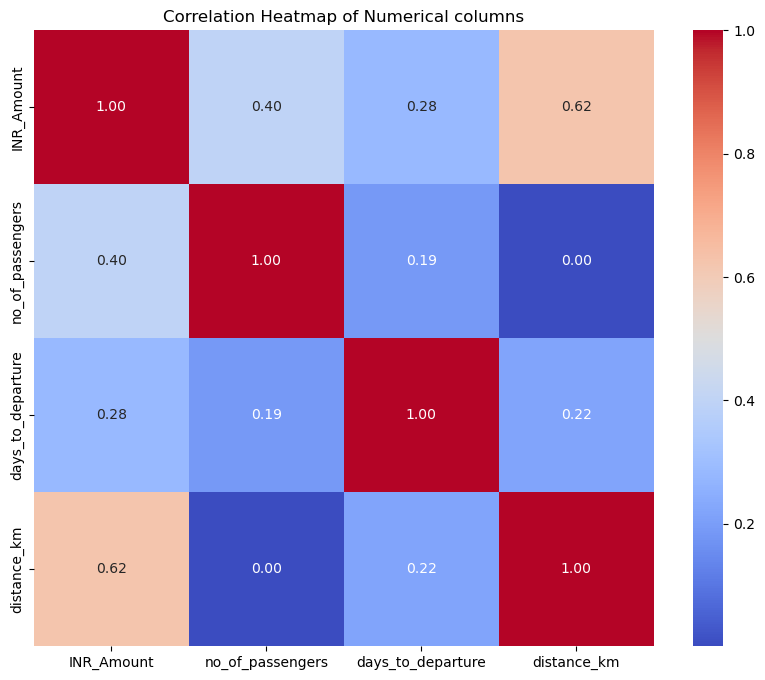

In [24]:
#Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap of Numerical columns")
plt.show()
            

In [25]:
print("Pair of numerical columns with maximum correlation:",max_corr_pair)
print("Maximum correlation valu:",max_corr_value)

Pair of numerical columns with maximum correlation: ('INR_Amount', 'distance_km')
Maximum correlation valu: 0.6235653096997817


### 8) For each service, which is the most used device type for making bookings on the platform?

In [26]:
#Group by service none and device_type_used and count Bookings
device_stats = bookings_df.groupby(["service_name","device_type_used"]).size().reset_index(name='booking_count')
device_stats

,service_name,device_type_used,booking_count
0,GOIBIBO,Android,44
1,GOIBIBO,Desktop,61
2,GOIBIBO,IOS,70
3,GOIBIBO,MobileWeb,11
4,MMT,Android,8
5,MMT,Desktop,30
6,MMT,IOS,5
7,MMT,MobileWeb,5
8,YATRA,Android,18
9,YATRA,Desktop,51


In [27]:
#Find the device type with the highest number of bookings for each other
max_booking_device = device_stats.loc[device_stats.groupby('service_name')["booking_count"].idxmax()]
max_booking_device

,service_name,device_type_used,booking_count
2,GOIBIBO,IOS,70
5,MMT,Desktop,30
9,YATRA,Desktop,51


In [28]:
print("Most used device type for making booking on the platform for each service")
print(max_booking_device)

Most used device type for making booking on the platform for each service
  service_name device_type_used  booking_count
2      GOIBIBO              IOS             70
5          MMT          Desktop             30
9        YATRA          Desktop             51


### 9)Plot the trends at a quarterly frequency for the numberof bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

In [29]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [52]:
#Convert bookings_time column to datetime format and set a class
bookings_df["booking_time"] = pd.to_datetime(bookings_df["booking_time"])
bookings_df.set_index("booking_time",inplace=True)

In [53]:
bookings_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
booking_time,,,,,,,,,,,,
2020-02-05 16:12:08+00:00,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,Desktop,2565.28,MMT,1.0,10.0,747.8
2018-11-21 08:21:47+00:00,customer_303,booking_156,Delhi,India,Brussels,Belgium,Android,23120.00,YATRA,1.0,1.0,6701.5
2019-12-16 22:54:58+00:00,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,Android,25717.60,YATRA,1.0,32.0,7712.0
2021-10-29 12:25:38+00:00,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
2020-08-11 16:09:10+00:00,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-14 14:20:20+00:00,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,IOS,2721.60,YATRA,1.0,26.0,421.0
2020-03-21 06:40:56+00:00,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
2020-01-31 20:35:35+00:00,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9


In [32]:
#Resample data at quaterly frequence and count bookings for each device
quaterly_device_bookings = bookings_df.groupby([pd.Grouper(freq = "Q"),'device_type_used']).size().unstack()
quaterly_device_bookings

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
booking_time,,,,,
2018-09-30 00:00:00+00:00,3.0,6.0,NaN,2.0,1.0
2018-12-31 00:00:00+00:00,3.0,22.0,4.0,4.0,1.0
2019-03-31 00:00:00+00:00,NaN,1.0,NaN,NaN,NaN
2019-06-30 00:00:00+00:00,NaN,1.0,NaN,NaN,1.0
2019-09-30 00:00:00+00:00,3.0,7.0,4.0,NaN,NaN
2019-12-31 00:00:00+00:00,14.0,15.0,14.0,NaN,NaN
2020-03-31 00:00:00+00:00,19.0,29.0,25.0,10.0,NaN
2020-06-30 00:00:00+00:00,2.0,NaN,NaN,NaN,NaN
2020-09-30 00:00:00+00:00,3.0,NaN,4.0,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

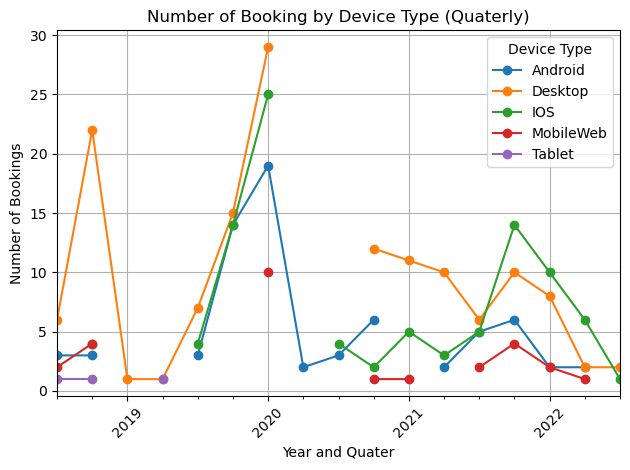

In [33]:
#Plot trends for each device type
plt.figure(figsize=(10,6))
quaterly_device_bookings.plot(marker="o")
plt.title("Number of Booking by Device Type (Quaterly)")
plt.xlabel("Year and Quater")
plt.ylabel("Number of Bookings")
plt.legend(title="Device Type")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

### 10) a) What is the average oBSR for eachday of the week?

In [34]:
#Calculate the total number of bookings for each month of the year
monthly_stats = bookings_df.resample("M").size().reset_index(name="total_bookings")

#Calculate the total  number of bookings for each day of the week
weekly_stats = bookings_df.resample('D').size().reset_index(name="total_bookings")
weekly_stats["day_of_week"] = weekly_stats["booking_time"].dt.day_name()

#Group by day of the week and calculate average oBSR
weekly_avg_obsr = weekly_stats.groupby('day_of_week').mean()

#print average oBSR for each day of the week
print("Average oBSR for each day of the week:")
print(weekly_avg_obsr)

Average oBSR for each day of the week:
                         booking_time  total_bookings
day_of_week                                          
Friday      2020-08-07 00:00:00+00:00        0.253731
Monday      2020-08-10 00:00:00+00:00        0.253731
Saturday    2020-08-08 00:00:00+00:00        0.218905
Sunday      2020-08-09 00:00:00+00:00        0.174129
Thursday    2020-08-06 00:00:00+00:00        0.323383
Tuesday     2020-08-04 00:00:00+00:00        0.293532
Wednesday   2020-08-05 00:00:00+00:00        0.169154


### 10) b) Average oBSR for each month

In [39]:
sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [47]:
# Convert 'booking_time' column to datetime
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], errors = 'coerce')

In [54]:
# Calculate oBSR (overall booking to search ratio) for each day
sessions_per_day = sessions_df.groupby(sessions_df['search_time'].dt.strftime('%Y-%m-%d'))['search_id'].nunique()
bookings_per_day = bookings_df.groupby(bookings_df.index.strftime('%Y-%m-%d'))['booking_id'].nunique()
oBSR_daily = bookings_per_day / sessions_per_day

# Set the index of oBSR to be a datetime index
oBSR_daily.index = pd.to_datetime(oBSR_daily.index)

# Average oBSR for each month
average_oBSR_monthly = oBSR_daily.resample('M').mean()
print(average_oBSR_monthly)

2018-09-30    0.524675
2018-10-31    0.266565
2018-11-30    0.565038
2018-12-31    0.411765
2019-01-31    0.333333
2019-02-28         NaN
2019-03-31         NaN
2019-04-30         NaN
2019-05-31         NaN
2019-06-30    1.000000
2019-07-31    0.268939
2019-08-31    0.350000
2019-09-30    0.750000
2019-10-31    0.602561
2019-11-30    0.674020
2019-12-31    0.483241
2020-01-31    0.351914
2020-02-29    0.507868
2020-03-31    0.490220
2020-04-30         NaN
2020-05-31         NaN
2020-06-30         NaN
2020-07-31         NaN
2020-08-31         NaN
2020-09-30         NaN
2020-10-31         NaN
2020-11-30         NaN
2020-12-31         NaN
2021-01-31         NaN
2021-02-28         NaN
2021-03-31         NaN
2021-04-30         NaN
2021-05-31         NaN
2021-06-30         NaN
2021-07-31         NaN
2021-08-31         NaN
2021-09-30         NaN
2021-10-31         NaN
2021-11-30         NaN
2021-12-31         NaN
2022-01-31         NaN
2022-02-28         NaN
2022-03-31         NaN
2022-04-30 

In [55]:
# Convert the index to a datetime index
average_oBSR_monthly.index = pd.to_datetime(average_oBSR_monthly.index)

# Get month names for the index
average_oBSR_monthly.index = average_oBSR_monthly.index.strftime('%B')

# Display the average oBSR for each month
print(average_oBSR_monthly)

September    0.524675
October      0.266565
November     0.565038
December     0.411765
January      0.333333
February          NaN
March             NaN
April             NaN
May               NaN
June         1.000000
July         0.268939
August       0.350000
September    0.750000
October      0.602561
November     0.674020
December     0.483241
January      0.351914
February     0.507868
March        0.490220
April             NaN
May               NaN
June              NaN
July              NaN
August            NaN
September         NaN
October           NaN
November          NaN
December          NaN
January           NaN
February          NaN
March             NaN
April             NaN
May               NaN
June              NaN
July              NaN
August            NaN
September         NaN
October           NaN
November          NaN
December          NaN
January           NaN
February          NaN
March             NaN
April             NaN
May               NaN
June      

In [56]:
# Calculate oBSR for each day of the week
oBSR_daily.index = pd.to_datetime(oBSR_daily.index)  # Ensure index is datetime
oBSR_weekly = oBSR_daily.groupby(oBSR_daily.index.day_name()).mean()
print(oBSR_weekly)

Friday       0.429766
Monday       0.501644
Saturday     0.486387
Sunday       0.518544
Thursday     0.552327
Tuesday      0.462460
Wednesday    0.387806
dtype: float64


In [57]:
oBSR_daily

2018-09-04    0.333333
2018-09-11    1.000000
2018-09-21    0.400000
2018-09-23    1.000000
2018-09-24    0.333333
                ...   
2022-06-04         NaN
2022-06-29         NaN
2022-07-01         NaN
2022-07-06         NaN
2022-07-11         NaN
Length: 258, dtype: float64

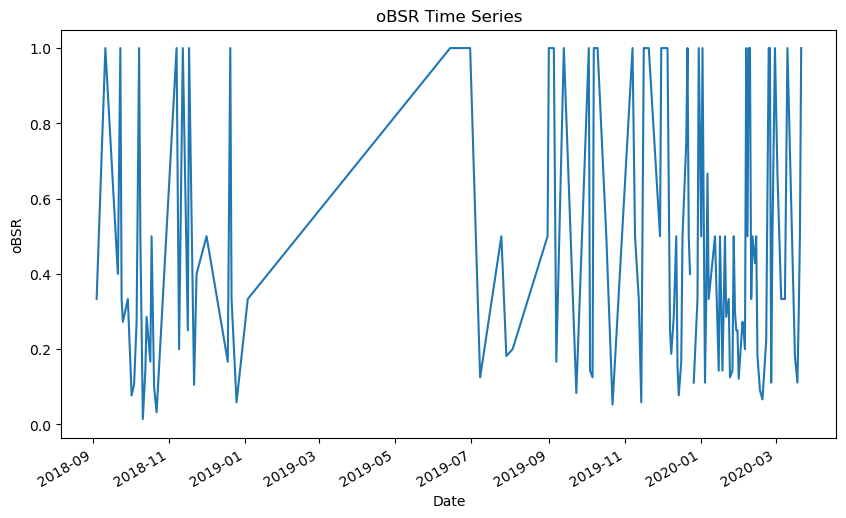

In [58]:
# Plot time series of oBSR
plt.figure(figsize=(10, 6))
oBSR_daily.plot()
plt.title('oBSR Time Series')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.show()